# Table of Contents
[1.Load data](#1.-Load-data)

[2. Data Preprocessing and Cleaning](#2.-Data-Preprocessing-and-Cleaning)

[3. Exploratory Analysis and Visualization](#3.-Exploratory-Analysis-and-Visualization)

[Question 1: Which countries have the highest percentage of people using Stack Overflow?](#Question-1:-Which-countries-have-the-highest-percentage-of-people-using-Stack-Overflow?)

[Question 2: What demographic are most of our Stack Overflow users in?](#Question-2:-What-demographic-are-most-of-our-Stack-Overflow-users-in?)

[Question 3: Which programming languages are most used in 2021 and which ones would become a trend in 2022?](#Question-3:-Which-programming-languages-are-most-used-in-2021-and-which-ones-would-become-a-trend-in-2022?)

[Question 4: Which databases are most used in 2021 and which ones would become a trend in 2022?](#Question-4:-Which-databases-are-most-used-in-2021-and-which-ones-would-become-a-trend-in-2022?)

## 1. Load data

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import squarify

In [2]:
# Load data
survey_df = pd.read_csv('../survey_results_public.csv')

In [3]:
survey_df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [4]:
survey_df.describe()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.000000,4.718300e+04,4.684400e+04
mean,41720.000000,2.119407e+69,1.184262e+05
std,24086.908893,4.603702e+71,5.272944e+05
min,1.000000,0.000000e+00,1.000000e+00
25%,20860.500000,1.600000e+04,2.702500e+04
50%,41720.000000,6.700000e+04,5.621100e+04
75%,62579.500000,1.400000e+05,1.000000e+05
max,83439.000000,1.000000e+74,4.524131e+07


In [5]:
# Check percentage of the missing values
total = survey_df.isnull().sum().sort_values(ascending = False)
percent = (survey_df.isnull().sum()/survey_df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1,keys = ['Total','Percentage'])
missing_data

,Total,Percentage
UK_Country,79021,94.705114
US_State,68519,82.118674
MiscTechWantToWorkWith,45418,54.432579
PlatformWantToWorkWith,41820,50.120447
ConvertedCompYearly,36595,43.858388
MiscTechHaveWorkedWith,36384,43.605508
CompTotal,36256,43.452103
WebframeWantToWorkWith,31344,37.565167
PlatformHaveWorkedWith,31304,37.517228
CompFreq,31289,37.499251


# 2. Data Preprocessing and Cleaning

In [6]:
selected_columns = [
    'Country',
    'Age',
    'Gender',
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith',
    'DatabaseWantToWorkWith',
    'Employment'
]

In [7]:
# Keep the columns belong to selected_columns only
survey_clean_df = survey_df[selected_columns].copy()

In [8]:
survey_clean_df.head()

,Country,Age,Gender,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,Employment
0,Slovakia,25-34 years old,Man,NaN,NaN,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,"Independent contractor, freelancer, or self-em..."
1,Netherlands,18-24 years old,Man,7,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,"Student, full-time"
2,Russian Federation,18-24 years old,Man,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,"Student, full-time"
3,Austria,35-44 years old,Man,NaN,NaN,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,Employed full-time
4,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,17,10,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,"Independent contractor, freelancer, or self-em..."


In [9]:
survey_clean_df.describe()

,Country,Age,Gender,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,Employment
count,83439,82407,82286,81641,61216,82357,76821,69546,58299,83323
unique,181,8,16,52,52,28690,27545,3072,3137,9
top,United States of America,25-34 years old,Man,5,3,Python,Python,MySQL,PostgreSQL,Employed full-time
freq,15288,32568,74817,6190,5812,1337,1389,4777,4200,53584


In [10]:
survey_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 10 columns):
Country                   83439 non-null object
Age                       82407 non-null object
Gender                    82286 non-null object
YearsCode                 81641 non-null object
YearsCodePro              61216 non-null object
LanguageHaveWorkedWith    82357 non-null object
LanguageWantToWorkWith    76821 non-null object
DatabaseHaveWorkedWith    69546 non-null object
DatabaseWantToWorkWith    58299 non-null object
Employment                83323 non-null object
dtypes: object(10)
memory usage: 6.4+ MB


In [11]:
survey_clean_df.shape

(83439, 10)

# 3. Exploratory Analysis and Visualization

## Question 1: Which countries have the highest percentage of people using Stack Overflow?

In [12]:
survey_clean_df.Country.nunique()

181

In [13]:
# Top 15 Countries by Respondents
top_countries = survey_clean_df.Country.value_counts().head(15)
top_countries

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
France                                                   2708
Brazil                                                   2254
Poland                                                   1805
Netherlands                                              1772
Italy                                                    1666
Australia                                                1646
Spain                                                    1485
Russian Federation                                       1474
Sweden                                                   1196
China                                                    1055
Name: Country, dtype: int64

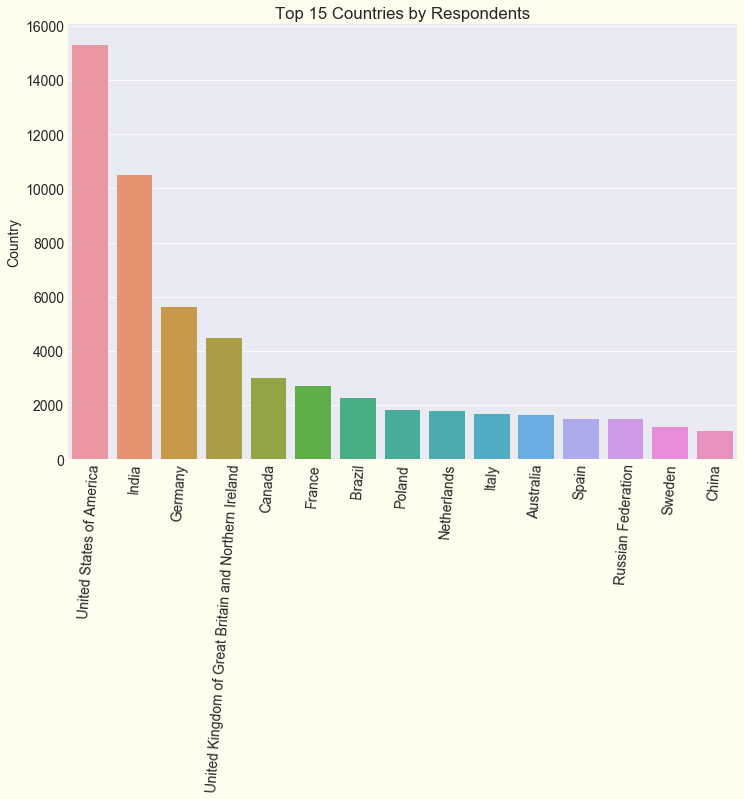

In [14]:
# Visualize the Top 15 Countries by Respondents
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#FFF00011'
plt.figure(figsize=(12,8))
plt.xticks(rotation=86)
plt.title('Top 15 Countries by Respondents')
sns.barplot(x=top_countries.index, y=top_countries);

#### Of course, United States of America, India, and Germany are the top 3 countries using Stack Overflow

## Question 2: What demographic are most of our Stack Overflow users in?

In [15]:
# Count the value for each demographic group
common_age = survey_clean_df.Age.value_counts()
common_age

25-34 years old       32568
18-24 years old       20993
35-44 years old       15183
45-54 years old        5472
Under 18 years old     5376
55-64 years old        1819
Prefer not to say       575
65 years or older       421
Name: Age, dtype: int64

In [16]:
# Replace long labels in common_age column
as_list = common_age.index.tolist()
idx = as_list.index('Prefer not to say')
as_list[idx] = 'Not say'
idx = as_list.index('65 years or older')
as_list[idx] = '65+'
common_age.index = as_list
common_age.index

Index(['25-34 years old', '18-24 years old', '35-44 years old',
       '45-54 years old', 'Under 18 years old', '55-64 years old', 'Not say',
       '65+'],
      dtype='object')

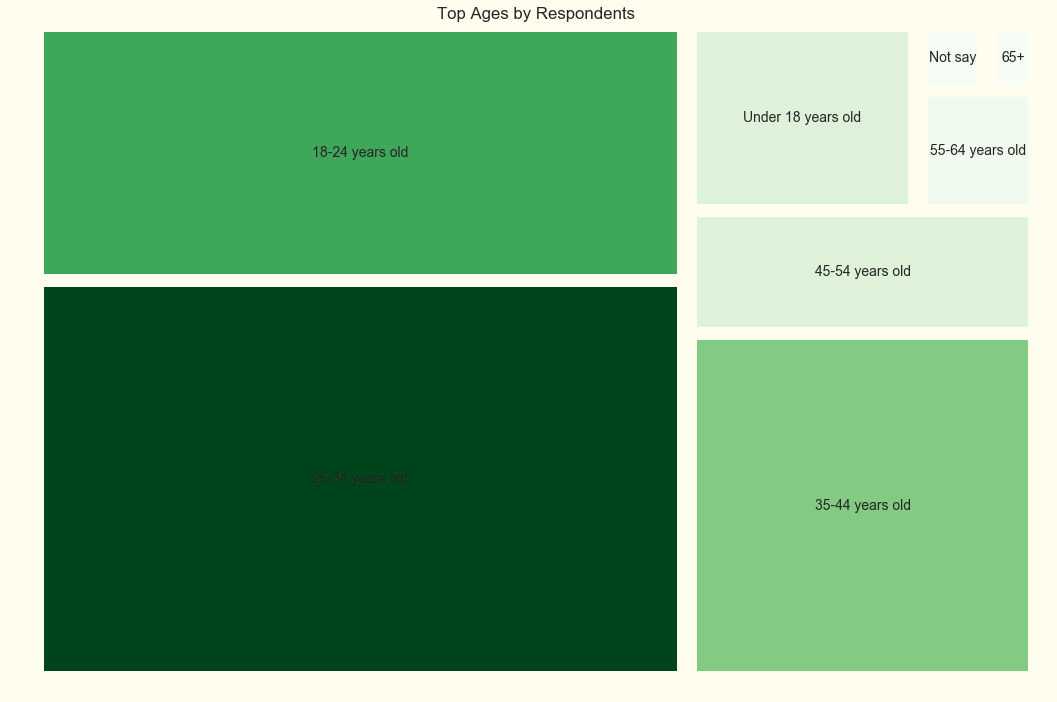

In [17]:
# Visualize the Top Ages by Respondents with Treemap
plt.figure(figsize=(18, 12))
cmap = matplotlib.cm.Greens
mini=min(common_age.values)
maxi=max(common_age.values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in common_age.values]
plt.axis('off')
plt.title('Top Ages by Respondents')
squarify.plot(sizes=common_age.values, label=common_age.index, color=colors, pad = True)

#### We can easily say that most of the Stack Overflow users are in the demographics of 25–34-years-old , followed by demographics of 18–24-years-old and 35-44-years-old

## Question 3: Which programming languages are most used in 2021 and which ones would become a trend in 2022?

In [18]:
def split_multicolumn(col_series):
    '''
    Split a column in to multiple columns by each value.

    Parameters:
            col_series (serie): A pandas serie

    Returns:
            result_df[options] (dataframe): a dataFrame contains all columns splitted from col_series
    '''
    result_df = col_series.to_frame()
    options = []
    # Loop through the columns
    for i, value  in col_series[col_series.notnull()].iteritems():
        for option in value.split(';'):
            # Add the option as a coulum if it does not exist
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = 0
            # Set the value in the option = 1 if it already existed
            result_df.at[i, option] = 1
    return result_df[options]

In [19]:
def calculate_percentages(df):
    return df.mean().sort_values(ascending=False) * 100 

In [20]:
# Split LanguageHaveWorkedWith column into columns corresponding to each language
languages_worked_df = split_multicolumn(survey_clean_df.LanguageHaveWorkedWith)
languages_worked_df

,C++,HTML/CSS,JavaScript,Objective-C,PHP,Swift,Python,Assembly,C,R,...,VBA,Groovy,Clojure,APL,LISP,F#,Elixir,Erlang,Crystal,COBOL
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Calculate the percentages of each language
languages_worked_percentages = calculate_percentages(languages_worked_df)
languages_worked_percentages

JavaScript     64.222965
HTML/CSS       55.440501
Python         47.689929
SQL            46.542983
Java           34.950083
Node.js        33.527487
TypeScript     29.852946
C#             27.545872
Bash/Shell     26.827982
C++            24.037920
PHP            21.728448
C              20.768466
PowerShell     10.631719
Go              9.442826
Kotlin          8.228766
Rust            6.949987
Ruby            6.674337
Dart            5.950455
Assembly        5.551361
Swift           5.038411
R               5.015640
VBA             4.610554
Matlab          4.609355
Groovy          2.971033
Objective-C     2.768490
Scala           2.574336
Perl            2.430518
Haskell         2.096142
Delphi          2.074569
Clojure         1.860041
Elixir          1.723415
LISP            1.313534
Julia           1.279977
F#              0.963578
Erlang          0.780211
APL             0.642385
Crystal         0.558492
COBOL           0.523736
dtype: float64

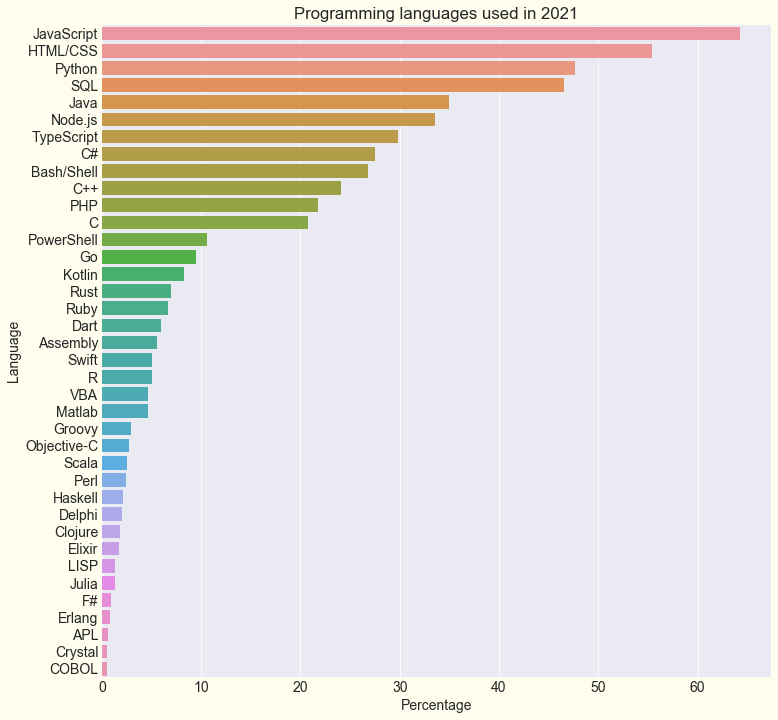

In [22]:
# Visualize the Programming languages used in 2021
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Programming languages used in 2021");
plt.xlabel('Percentage');
plt.ylabel('Language');

#### According to this chart, JavaScript is currently the most commonly-used language, followed by HTML/CSS and Python

In [23]:
# Split LanguageWantToWorkWith column into columns corresponding to each language
languages_want_to_work_df = split_multicolumn(survey_clean_df.LanguageWantToWorkWith)
languages_want_to_work_df

,Swift,Julia,Python,Rust,JavaScript,TypeScript,Bash/Shell,HTML/CSS,SQL,C#,...,Elixir,PowerShell,VBA,Matlab,LISP,Erlang,Groovy,Crystal,Delphi,COBOL
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,1,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Calculate the percentages of each language
languages_want_to_work_percentages = calculate_percentages(languages_want_to_work_df)
languages_want_to_work_percentages

JavaScript     44.353360
Python         41.861719
HTML/CSS       35.178993
TypeScript     32.245113
SQL            31.916730
Node.js        28.883376
C#             21.571447
Java           20.640228
Rust           19.013890
Go             18.921607
C++            18.275627
Bash/Shell     16.830259
Kotlin         12.812953
C              11.627656
PHP            10.608948
Dart            8.410935
Swift           7.613946
Ruby            5.922890
PowerShell      5.867760
R               4.811899
Assembly        4.288163
Haskell         4.138353
Elixir          4.043673
Scala           3.793190
Julia           2.930284
Clojure         2.891933
F#              2.585122
Matlab          1.872026
LISP            1.813301
Objective-C     1.677872
Erlang          1.652704
Groovy          1.410611
Perl            1.408214
VBA             1.281175
Delphi          1.168518
Crystal         0.946799
APL             0.680737
COBOL           0.370330
dtype: float64

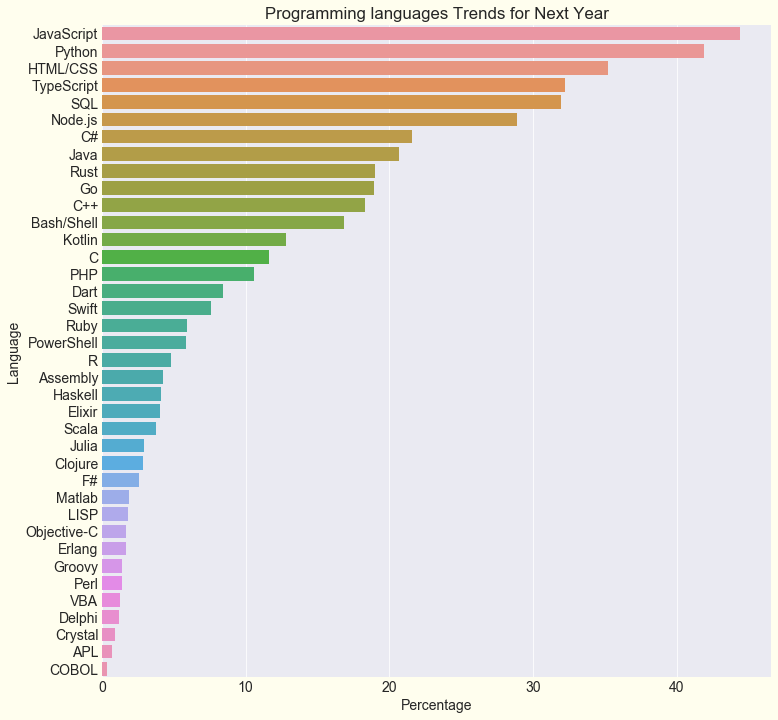

In [25]:
# Visualize the Programming languages used in 2021
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_want_to_work_percentages, y=languages_want_to_work_percentages.index)
plt.title('Programming languages Trends for Next Year')
plt.xlabel('Percentage');
plt.ylabel('Language');

#### There is a little change in the order of the languages but JavaScript, Python, and HTML/CSS would still be hot

## Question 4: Which databases are most used in 2021 and which ones would become a trend in 2022?

In [26]:
# Split DatabaseHaveWorkedWith column into columns corresponding to each language
database_worked_df = split_multicolumn(survey_clean_df.DatabaseHaveWorkedWith)
database_worked_df

,PostgreSQL,SQLite,Elasticsearch,Redis,MySQL,Microsoft SQL Server,Oracle,MongoDB,MariaDB,DynamoDB,Couchbase,Firebase,Cassandra,IBM DB2
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# Calculate the percentages of each database
database_worked_percentages = calculate_percentages(database_worked_df)
database_worked_percentages

MySQL                   42.293172
PostgreSQL              34.065605
SQLite                  27.126404
MongoDB                 23.345198
Microsoft SQL Server    22.646484
Redis                   17.440286
MariaDB                 14.487230
Firebase                13.630317
Elasticsearch           11.183020
Oracle                  10.628124
DynamoDB                 6.156593
Cassandra                2.244754
IBM DB2                  1.723415
Couchbase                1.325519
dtype: float64

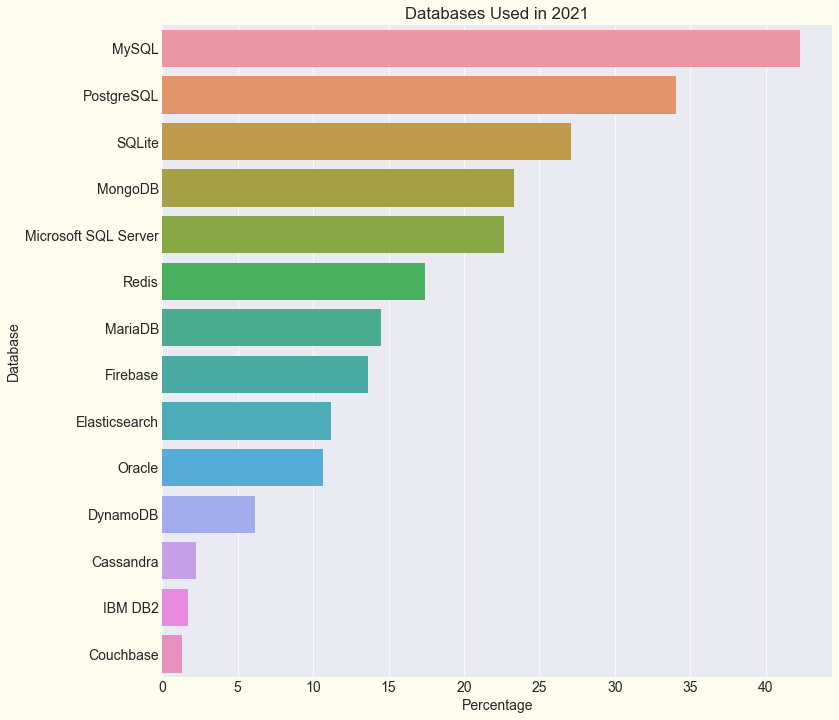

In [28]:
# Visualize the Databases Used in 2021
plt.figure(figsize=(12, 12))
plt.title("Databases Used in 2021")
plt.xlabel('Percentage');
plt.ylabel('Database');
sns.barplot(x=database_worked_percentages, y=database_worked_percentages.index)

#### So the most omnipresent is MySQL(42.3%), followed by PostgreSQL, and SQLite

In [29]:
# Split DatabaseWantToWorkWith column into columns corresponding to each database
database_want_to_work_df = split_multicolumn(survey_clean_df.DatabaseWantToWorkWith)
database_want_to_work_df

,SQLite,Cassandra,Elasticsearch,PostgreSQL,Redis,Firebase,IBM DB2,MariaDB,Microsoft SQL Server,MySQL,MongoDB,Couchbase,DynamoDB,Oracle
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,0,0,0,0,0,0,0,0,0
5,1,0,1,1,0,1,1,1,1,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# Calculate the percentages of each database
database_wan_to_work_percentages = calculate_percentages(database_want_to_work_df)
database_wan_to_work_percentages

PostgreSQL              32.457244
MySQL                   24.337540
MongoDB                 24.126607
Redis                   20.628243
SQLite                  18.433826
Elasticsearch           13.955105
Microsoft SQL Server    13.655485
Firebase                12.914824
MariaDB                  9.798775
DynamoDB                 7.237623
Oracle                   5.461475
Cassandra                5.065976
Couchbase                2.001462
IBM DB2                  0.812570
dtype: float64

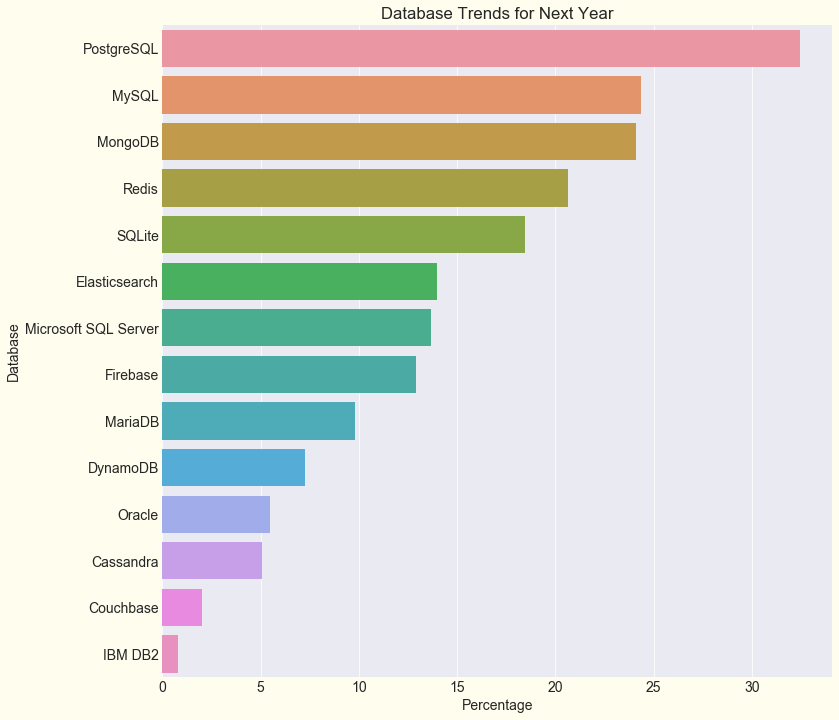

In [31]:
# Visualize the Database Trends for Next Year
plt.figure(figsize=(12, 12))
plt.title('Database Trends for Next Year')
plt.xlabel('Percentage');
plt.ylabel('Database');
sns.barplot(x=database_wan_to_work_percentages, y=database_wan_to_work_percentages.index)

#### PostgreSQL and MySQL would still be trends in 2022. New trends need to be mentioned here is MongoDB, a NoSQL database program. Let's wait and see if this kind of database can rule the world in the near future? 